https://github.com/ZhiqingXiao/rl-book/blob/master/chapter02_mdp/useBellman.ipynb

In [1]:
!pip install gym sympy -t /home/aistudio/external-libraries

Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 5.9MB 13.1MB/s eta 0:00:01
     |████████████████████████████████| 2.2MB 12.5MB/s eta 0:00:01     |█████████▉                      | 675kB 12.5MB/s eta 0:00:01
     |████████████████████████████████| 25.9MB 8.5MB/s eta 0:00:011    |███████████                     | 9.0MB 25.1MB/s eta 0:00:01
     |████████████████████████████████| 1.0MB 15.1MB/s eta 0:00:01
     |████████████████████████████████| 14.5MB 9.3MB/s eta 0:00:011    |███████████▍                    | 5.2MB 20.5MB/s eta 0:00:01
     |████████████████████████████████| 522kB 14.3MB/s eta 0:00:01
  Created wheel for mpmath: filename=mpmath-1.1.0-cp37-none-any.whl size=532240 sha256=22d97fde2203c65024bbfb98c491387d25d86861016896df4fb0547dea078d97
  Stored in directory: /home/aistudio/.cache/pip/wheels/c6/1e/5e/373186902ef771162067c9a78c4394535839a8e82ca874fea0
Successfully built mpmath
ERROR: xarray 0.16.2 has requirement pandas>=0.2

In [2]:
import sys 
sys.path.append('/home/aistudio/external-libraries')

In [3]:
import sympy
from sympy import symbols
sympy.init_printing()

In [4]:
system = sympy.Matrix((
        (1, 0, x-1, -x, 0, 0, 0),
        (0, 1, 0, 0, -y, y-1, 0),
        (-gamma, 0, 1, 0, 0, 0, -2),
        ((alpha-1)*gamma, -alpha*gamma, 0, 1, 0, 0, 4*alpha-3),
        (-beta*gamma, (beta-1)*gamma, 0, 0, 1, 0, -4*beta+2),
        (0, -gamma, 0, 0, 0, 1, 1) ))
sympy.solve_linear_system(system,
        v_hungry, v_full,
        q_hungry_none, q_hungry_eat, q_full_none, q_full_eat)

NameError: name 'x' is not defined

In [5]:
v_hungry, v_full = symbols('v_hungry v_full')
q_hungry_eat, q_hungry_none, q_full_eat, q_full_none = \
        symbols('q_hungry_eat q_hungry_none q_full_eat q_full_none')
alpha, beta, gamma = symbols('alpha beta gamma')
x, y = symbols('x y')

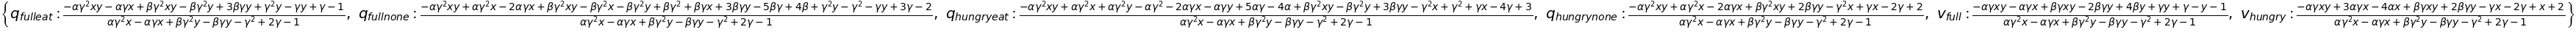

In [6]:
system = sympy.Matrix((
        (1, 0, x-1, -x, 0, 0, 0),
        (0, 1, 0, 0, -y, y-1, 0),
        (-gamma, 0, 1, 0, 0, 0, -2),
        ((alpha-1)*gamma, -alpha*gamma, 0, 1, 0, 0, 4*alpha-3),
        (-beta*gamma, (beta-1)*gamma, 0, 0, 1, 0, -4*beta+2),
        (0, -gamma, 0, 0, 0, 1, 1) ))
sympy.solve_linear_system(system,
        v_hungry, v_full,
        q_hungry_none, q_hungry_eat, q_full_none, q_full_eat)

## 求解 Bellman 最优方程

==== v(饿) = q(饿,不吃), v(饱) = q(饱,吃) ==== x = 0, y = 0 ====
==== v(饿) = q(饿,吃), v(饱) = q(饱,吃) ==== x = 1, y = 0 ====


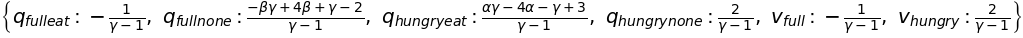

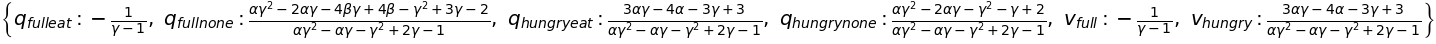

==== v(饿) = q(饿,不吃), v(饱) = q(饱,不吃) ==== x = 0, y = 1 ====


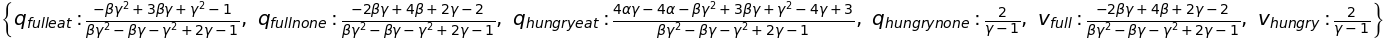

==== v(饿) = q(饿,吃), v(饱) = q(饱,不吃) ==== x = 1, y = 1 ====


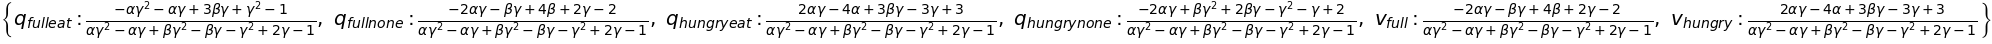

In [7]:
xy_tuples = ((0, 0), (1, 0), (0, 1), (1, 1))
for x, y in xy_tuples:
    system = sympy.Matrix((
            (1, 0, x-1, -x, 0, 0, 0),
            (0, 1, 0, 0, -y, y-1, 0),
            (-gamma, 0, 1, 0, 0, 0, -2),
            ((alpha-1)*gamma, -alpha*gamma, 0, 1, 0, 0, 4*alpha-3),
            (-beta*gamma, (beta-1)*gamma, 0, 0, 1, 0, -4*beta+2),
            (0, -gamma, 0, 0, 0, 1, 1) ))
    result = sympy.solve_linear_system(system,
            v_hungry, v_full,
            q_hungry_none, q_hungry_eat, q_full_none, q_full_eat, simplification=True)
    msgx = 'v(饿) = q(饿,{}吃)'.format('' if x else '不')
    msgy = 'v(饱) = q(饱,{}吃)'.format('不' if y else '')
    print('==== {}, {} ==== x = {}, y = {} ===='.format(msgx, msgy, x, y))
    display(result)